<a href="https://colab.research.google.com/github/harshaelon/opencv_basics/blob/main/Text_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install paddlepaddle-gpu
# installing the pre-trained OCR model.



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 758.9/758.9 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.9 MB/s eta 0:00:00


In [2]:
!pip install "paddleocr>=2.0.1"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.0/780.0 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 299.2/299.2 kB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 22.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 38.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 103.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.6/239.6 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 kB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 106.7 MB

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory





download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 240kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv4/english/en_PP-OCRv4_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer/en_PP-OCRv4_rec_infer.tar


100%|██████████| 10.2M/10.2M [00:18<00:00, 543kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:14<00:00, 148kiB/s]

[2024/04/03 18:18:00] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/

In [3]:
from google.colab.patches import cv2_imshow
import cv2

In [4]:
from PIL import Image

#command to change the pngs to jpeg format.
# Open the PNG file
png_image = Image.open("/content/drive/MyDrive/sharpened_images/sharpened_pic_1.png")

# Convert and save as JPEG
png_image.convert("RGB").save("/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture2.jpg", "JPEG")


In [11]:
from PIL import Image

#command to change the pngs to jpeg format.
# Open the PNG file
png_image = Image.open("/content/drive/MyDrive/sharpened_images/sharpened_pic_2.png")

# Convert and save as JPEG
png_image.convert("RGB").save("/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture3.jpg", "JPEG")


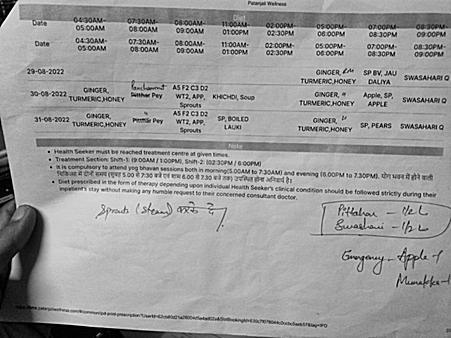

In [12]:

img_path = '/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture3.jpg'

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [13]:
result = ocr.ocr(img_path, cls=True)
for line in result:
    print(line)
    #l1.append(line)


[2024/04/03 18:26:15] ppocr DEBUG: dt_boxes num : 71, elapsed : 0.0603024959564209
[2024/04/03 18:26:16] ppocr DEBUG: cls num  : 71, elapsed : 0.10964608192443848
[2024/04/03 18:26:16] ppocr DEBUG: rec_res num  : 71, elapsed : 0.2837498188018799
[[[[252.0, 1.0], [287.0, 1.0], [287.0, 8.0], [252.0, 8.0]], ('a weet', 0.5406222939491272)], [[[32.0, 20.0], [47.0, 20.0], [47.0, 27.0], [32.0, 27.0]], ('Date', 0.8659262657165527)], [[[70.0, 14.0], [105.0, 14.0], [105.0, 24.0], [70.0, 24.0]], ('C4SOAM', 0.6208559274673462)], [[[73.0, 23.0], [107.0, 23.0], [107.0, 33.0], [73.0, 33.0]], ('O500AM', 0.7225896716117859)], [[[124.0, 15.0], [159.0, 15.0], [159.0, 25.0], [124.0, 25.0]], ('0730AM-', 0.7991762161254883)], [[[128.0, 24.0], [159.0, 24.0], [159.0, 35.0], [128.0, 35.0]], ('08.00AM', 0.7975410223007202)], [[[172.0, 17.0], [205.0, 17.0], [205.0, 27.0], [172.0, 27.0]], ('CS-0GAM-', 0.6620570421218872)], [[[173.0, 26.0], [205.0, 26.0], [205.0, 36.0], [173.0, 36.0]], ('09.00AM', 0.80048519372940

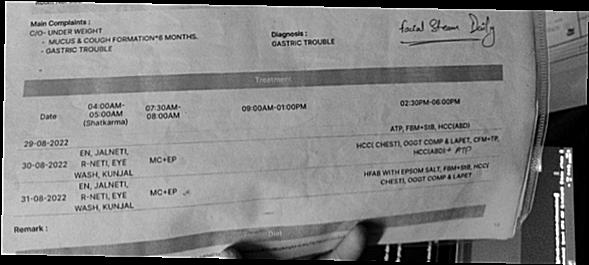

In [15]:

img_path = '/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture2.jpg'

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [16]:

l1=[]
result = ocr.ocr(img_path, cls=True)
for line in result:
    #print(line)
    l1.append(line)


l1

[2024/04/03 18:42:25] ppocr DEBUG: dt_boxes num : 32, elapsed : 0.03198862075805664
[2024/04/03 18:42:25] ppocr DEBUG: cls num  : 32, elapsed : 0.04405617713928223
[2024/04/03 18:42:25] ppocr DEBUG: rec_res num  : 32, elapsed : 0.12569427490234375


[[[[[30.0, 18.0], [92.0, 18.0], [92.0, 28.0], [30.0, 28.0]],
   ('Main Complaints:', 0.9047548770904541)],
  [[[399.0, 17.0], [487.0, 17.0], [487.0, 34.0], [399.0, 34.0]],
   ('fo', 0.7445660829544067)],
  [[[26.0, 28.0], [103.0, 24.0], [104.0, 34.0], [27.0, 39.0]],
   ('CIO-UNDER WEICHT', 0.7944250106811523)],
  [[[42.0, 35.0], [197.0, 30.0], [197.0, 41.0], [42.0, 47.0]],
   ('MUCUSCOUGHFORMATIONEMONTHS', 0.8812721967697144)],
  [[[270.0, 37.0], [335.0, 35.0], [336.0, 46.0], [270.0, 49.0]],
   ('GASTRIC TROUBLE', 0.9021214246749878)],
  [[[280.0, 30.0], [311.0, 30.0], [311.0, 37.0], [280.0, 37.0]],
   ('cnesis:', 0.7563155293464661)],
  [[[40.0, 46.0], [112.0, 42.0], [113.0, 53.0], [40.0, 56.0]],
   ('GASTRIC TROUILE', 0.8097005486488342)],
  [[[86.0, 101.0], [123.0, 98.0], [124.0, 108.0], [86.0, 111.0]],
   ('04.00AM', 0.8934077024459839)],
  [[[142.0, 102.0], [179.0, 99.0], [180.0, 111.0], [143.0, 113.0]],
   ('07:30AM', 0.8646010160446167)],
  [[[239.0, 103.0], [307.0, 99.0], [308.

In [10]:
l1

[[[[[30.0, 18.0], [92.0, 18.0], [92.0, 28.0], [30.0, 28.0]],
   ('Main Complaints:', 0.9047548770904541)],
  [[[399.0, 17.0], [487.0, 17.0], [487.0, 34.0], [399.0, 34.0]],
   ('fo', 0.7445660829544067)],
  [[[26.0, 28.0], [103.0, 24.0], [104.0, 34.0], [27.0, 39.0]],
   ('CIO-UNDER WEICHT', 0.7944250106811523)],
  [[[42.0, 35.0], [197.0, 30.0], [197.0, 41.0], [42.0, 47.0]],
   ('MUCUSCOUGHFORMATIONEMONTHS', 0.8812721967697144)],
  [[[270.0, 37.0], [335.0, 35.0], [336.0, 46.0], [270.0, 49.0]],
   ('GASTRIC TROUBLE', 0.9021214246749878)],
  [[[280.0, 30.0], [311.0, 30.0], [311.0, 37.0], [280.0, 37.0]],
   ('cnesis:', 0.7563155293464661)],
  [[[40.0, 46.0], [112.0, 42.0], [113.0, 53.0], [40.0, 56.0]],
   ('GASTRIC TROUILE', 0.8097005486488342)],
  [[[86.0, 101.0], [123.0, 98.0], [124.0, 108.0], [86.0, 111.0]],
   ('04.00AM', 0.8934077024459839)],
  [[[142.0, 102.0], [179.0, 99.0], [180.0, 111.0], [143.0, 113.0]],
   ('07:30AM', 0.8646010160446167)],
  [[[239.0, 103.0], [307.0, 99.0], [308.

In [17]:
from PIL import Image

#command to change the pngs to jpeg format.
# Open the PNG file
png_image = Image.open("/content/drive/MyDrive/sharpened_images/sharpened_pic_3.png")

# Convert and save as JPEG
png_image.convert("RGB").save("/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture4.jpg", "JPEG")


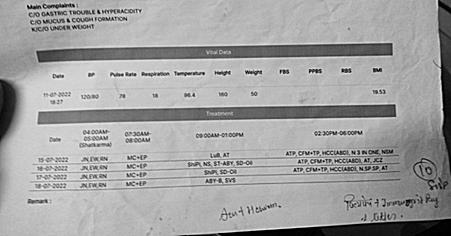

[2024/04/03 19:09:18] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.03744101524353027
[2024/04/03 19:09:18] ppocr DEBUG: cls num  : 7, elapsed : 0.025499582290649414
[2024/04/03 19:09:18] ppocr DEBUG: rec_res num  : 7, elapsed : 0.03585100173950195
[[[[190.0, 160.0], [251.0, 157.0], [252.0, 166.0], [191.0, 170.0]], ('SSSY', 0.5345714688301086)], [[[296.0, 157.0], [380.0, 157.0], [380.0, 164.0], [296.0, 164.0]], ('AT.CSMPMCCASCIAT.C', 0.6253618597984314)], [[[127.0, 171.0], [148.0, 171.0], [148.0, 178.0], [127.0, 178.0]], ('UC-EP', 0.8231295347213745)], [[[205.0, 177.0], [236.0, 177.0], [236.0, 184.0], [205.0, 184.0]], ('AST-E,SVS', 0.6914368867874146)], [[[217.0, 207.0], [280.0, 196.0], [283.0, 211.0], [219.0, 222.0]], ('AtutHe', 0.5486772656440735)]]


In [19]:


img_path1 = '/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture4.jpg'

img1 = cv2.imread(img_path1, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)

result = ocr.ocr(img_path1, cls=True)
for line in result:
    print(line)
    l1.append(line)



In [20]:
from PIL import Image

#command to change the pngs to jpeg format.
# Open the PNG file
png_image = Image.open("/content/drive/MyDrive/sharpened_images/sharpened_pic_4.png")

# Convert and save as JPEG
png_image.convert("RGB").save("/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture5.jpg", "JPEG")


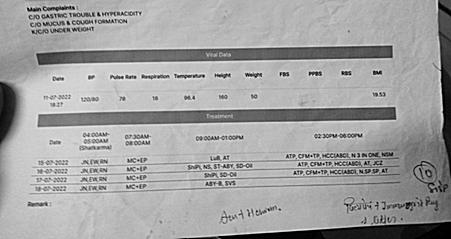

[2024/04/03 19:11:14] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.024583816528320312
[2024/04/03 19:11:14] ppocr DEBUG: cls num  : 11, elapsed : 0.016122817993164062
[2024/04/03 19:11:14] ppocr DEBUG: rec_res num  : 11, elapsed : 0.05788850784301758
[[[[79.0, 10.0], [142.0, 10.0], [142.0, 17.0], [79.0, 17.0]], ('ABLEAHYPERACIOXTY', 0.7490726113319397)], [[[194.0, 132.0], [244.0, 131.0], [244.0, 142.0], [194.0, 143.0]], ('PM0010-Y0060', 0.6023817658424377)], [[[186.0, 161.0], [251.0, 160.0], [251.0, 171.0], [186.0, 172.0]], ('SSAYS', 0.5591870546340942)], [[[211.0, 154.0], [231.0, 154.0], [231.0, 161.0], [211.0, 161.0]], ('AT', 0.9383062124252319)], [[[286.0, 152.0], [392.0, 152.0], [392.0, 159.0], [286.0, 159.0]], ('ATP.CMPHCCIASCNNONN', 0.7109129428863525)], [[[202.0, 171.0], [237.0, 168.0], [238.0, 179.0], [203.0, 182.0]], ('P', 0.5566768050193787)], [[[292.0, 169.0], [388.0, 169.0], [388.0, 176.0], [292.0, 176.0]], ('ATPCFM-TPHCCIASLNPEAT', 0.7057892084121704)], [[[206.0, 180.0], [2

In [22]:


img_path1 = '/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture5.jpg'

img1 = cv2.imread(img_path1, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)

result = ocr.ocr(img_path1, cls=True)
for line in result:
    print(line)
    l1.append(line)



In [24]:
from PIL import Image

#command to change the pngs to jpeg format.
# Open the PNG file
png_image = Image.open("/content/drive/MyDrive/sharpened_images/sharpened_pic_5.png")

# Convert and save as JPEG
png_image.convert("RGB").save("/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture6.jpg", "JPEG")


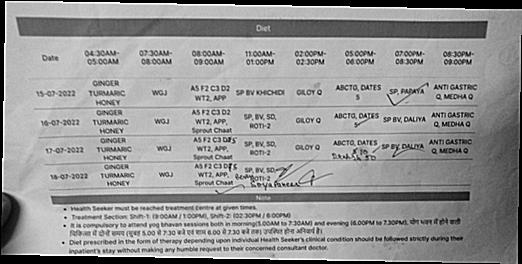

[2024/04/03 19:12:29] ppocr DEBUG: dt_boxes num : 74, elapsed : 0.06450533866882324
[2024/04/03 19:12:29] ppocr DEBUG: cls num  : 74, elapsed : 0.1012275218963623
[2024/04/03 19:12:29] ppocr DEBUG: rec_res num  : 74, elapsed : 0.26397156715393066
[[[[258.0, 24.0], [270.0, 24.0], [270.0, 31.0], [258.0, 31.0]], ('Det', 0.6439715623855591)], [[[41.0, 54.0], [60.0, 54.0], [60.0, 62.0], [41.0, 62.0]], ('Date', 0.9782834053039551)], [[[82.0, 48.0], [118.0, 45.0], [119.0, 56.0], [83.0, 59.0]], ('NYOCTO', 0.7363638877868652)], [[[86.0, 56.0], [120.0, 56.0], [120.0, 66.0], [86.0, 66.0]], ('05.00AM', 0.7176831364631653)], [[[139.0, 47.0], [172.0, 47.0], [172.0, 58.0], [139.0, 58.0]], ('WYOCLO', 0.724308431148529)], [[[138.0, 57.0], [173.0, 54.0], [174.0, 65.0], [139.0, 67.0]], ('CB00AM', 0.6652414202690125)], [[[189.0, 48.0], [224.0, 45.0], [225.0, 56.0], [190.0, 59.0]], ('O800AM', 0.5264983773231506)], [[[193.0, 57.0], [225.0, 57.0], [225.0, 67.0], [193.0, 67.0]], ('09-00AM', 0.8833395838737488

In [25]:


img_path1 = '/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture6.jpg'

img1 = cv2.imread(img_path1, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)

result = ocr.ocr(img_path1, cls=True)
for line in result:
    print(line)
    l1.append(line)



In [27]:
from PIL import Image

#command to change the pngs to jpeg format.
# Open the PNG file
png_image = Image.open("/content/drive/MyDrive/sharpened_images/sharpened_pic_6.png")

# Convert and save as JPEG
png_image.convert("RGB").save("/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture7.jpg", "JPEG")


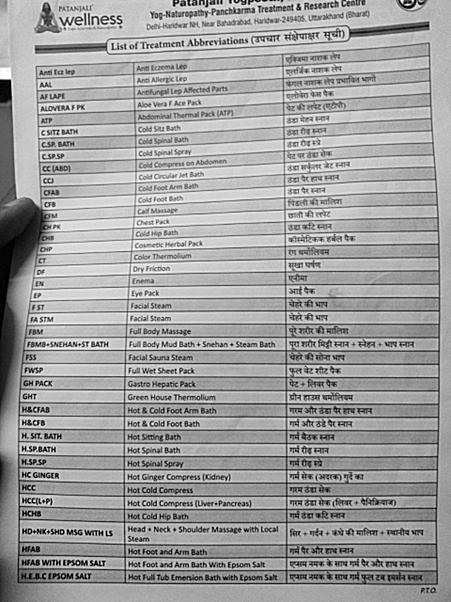

[2024/04/03 19:17:42] ppocr DEBUG: dt_boxes num : 131, elapsed : 0.08366274833679199
[2024/04/03 19:17:42] ppocr DEBUG: cls num  : 131, elapsed : 0.13540339469909668
[2024/04/03 19:17:42] ppocr DEBUG: rec_res num  : 131, elapsed : 0.43276476860046387
[[[[57.0, 2.0], [95.0, 2.0], [95.0, 13.0], [57.0, 13.0]], ('PATANJALE', 0.8766864538192749)], [[[146.0, 8.0], [366.0, 0.0], [367.0, 12.0], [146.0, 22.0]], ('Yog-Naturopathy-Panchkarma Treatment & Research Cealre', 0.9008437395095825)], [[[172.0, 1.0], [214.0, 1.0], [214.0, 8.0], [172.0, 8.0]], ('efueed', 0.5279244780540466)], [[[55.0, 12.0], [124.0, 10.0], [125.0, 27.0], [56.0, 29.0]], ('wellness', 0.9914571046829224)], [[[144.0, 21.0], [371.0, 7.0], [372.0, 21.0], [145.0, 35.0]], ('40', 0.6447722315788269)], [[[106.0, 41.0], [347.0, 26.0], [348.0, 39.0], [107.0, 54.0]], ('List of Treatment Abbreviations a  ', 0.8915944695472717)], [[[38.0, 67.0], [77.0, 67.0], [77.0, 77.0], [38.0, 77.0]], ('Anti Ect leg', 0.7479734420776367)], [[[134.0, 6

In [30]:


img_path1 = '/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture7.jpg'

img1 = cv2.imread(img_path1, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)

result = ocr.ocr(img_path1, cls=True)
for line in result:
    print(line)
    l1.append(line)



s2=l1

In [40]:
s2

[[[[[30.0, 18.0], [92.0, 18.0], [92.0, 28.0], [30.0, 28.0]],
   ('Main Complaints:', 0.9047548770904541)],
  [[[399.0, 17.0], [487.0, 17.0], [487.0, 34.0], [399.0, 34.0]],
   ('fo', 0.7445660829544067)],
  [[[26.0, 28.0], [103.0, 24.0], [104.0, 34.0], [27.0, 39.0]],
   ('CIO-UNDER WEICHT', 0.7944250106811523)],
  [[[42.0, 35.0], [197.0, 30.0], [197.0, 41.0], [42.0, 47.0]],
   ('MUCUSCOUGHFORMATIONEMONTHS', 0.8812721967697144)],
  [[[270.0, 37.0], [335.0, 35.0], [336.0, 46.0], [270.0, 49.0]],
   ('GASTRIC TROUBLE', 0.9021214246749878)],
  [[[280.0, 30.0], [311.0, 30.0], [311.0, 37.0], [280.0, 37.0]],
   ('cnesis:', 0.7563155293464661)],
  [[[40.0, 46.0], [112.0, 42.0], [113.0, 53.0], [40.0, 56.0]],
   ('GASTRIC TROUILE', 0.8097005486488342)],
  [[[86.0, 101.0], [123.0, 98.0], [124.0, 108.0], [86.0, 111.0]],
   ('04.00AM', 0.8934077024459839)],
  [[[142.0, 102.0], [179.0, 99.0], [180.0, 111.0], [143.0, 113.0]],
   ('07:30AM', 0.8646010160446167)],
  [[[239.0, 103.0], [307.0, 99.0], [308.

In [35]:
import re

#words=''
#for i in l1:

  #alphabets_only = re.findall(r'[a-zA-Z]+',i)
#words+=i

l1

[[[[[30.0, 18.0], [92.0, 18.0], [92.0, 28.0], [30.0, 28.0]],
   ('Main Complaints:', 0.9047548770904541)],
  [[[399.0, 17.0], [487.0, 17.0], [487.0, 34.0], [399.0, 34.0]],
   ('fo', 0.7445660829544067)],
  [[[26.0, 28.0], [103.0, 24.0], [104.0, 34.0], [27.0, 39.0]],
   ('CIO-UNDER WEICHT', 0.7944250106811523)],
  [[[42.0, 35.0], [197.0, 30.0], [197.0, 41.0], [42.0, 47.0]],
   ('MUCUSCOUGHFORMATIONEMONTHS', 0.8812721967697144)],
  [[[270.0, 37.0], [335.0, 35.0], [336.0, 46.0], [270.0, 49.0]],
   ('GASTRIC TROUBLE', 0.9021214246749878)],
  [[[280.0, 30.0], [311.0, 30.0], [311.0, 37.0], [280.0, 37.0]],
   ('cnesis:', 0.7563155293464661)],
  [[[40.0, 46.0], [112.0, 42.0], [113.0, 53.0], [40.0, 56.0]],
   ('GASTRIC TROUILE', 0.8097005486488342)],
  [[[86.0, 101.0], [123.0, 98.0], [124.0, 108.0], [86.0, 111.0]],
   ('04.00AM', 0.8934077024459839)],
  [[[142.0, 102.0], [179.0, 99.0], [180.0, 111.0], [143.0, 113.0]],
   ('07:30AM', 0.8646010160446167)],
  [[[239.0, 103.0], [307.0, 99.0], [308.

In [36]:
import re

def extract_words_and_alphabets(data):
    extracted_text = []
    for item in data:
        text = item[1][0]  # Extract text from the tuple
        # Use regular expression to extract only words and alphabets
        words_and_alphabets = re.findall(r'\b[a-zA-Z]+\b', text)
        extracted_text.extend(words_and_alphabets)
    return extracted_text

# Sample data
data = l1

# Extract words and alphabets
extracted_text = extract_words_and_alphabets(data)
print(extracted_text)


TypeError: expected string or bytes-like object

In [ ]:
def extract_alphabets(text):
    # Use regular expression to extract only alphabets
    alphabets_only = re.findall(r'[a-zA-Z]+', text)
    # Join the alphabets with spaces to form words
    words = ' '.join(alphabets_only)
    return words

# Sample text
text = "x1=obtainedinformatfurtherionbemayandchemistrysfellowlecturermoaesinscrofsgilliganasdescesdepfromtmentarleedsyandhoworrallyfrommreacmeasscollegesjerseys"

# Extract alphabets and add spaces
result = extract_alphabets(text)
print(result)


In [ ]:
# draw result
from PIL import Image, ImageDraw, ImageFont
image = Image.open(img_path).convert('RGB')

boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
font = ImageFont.load_default()
im_show = draw_ocr(image, boxes, txts, scores,font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf' )
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')


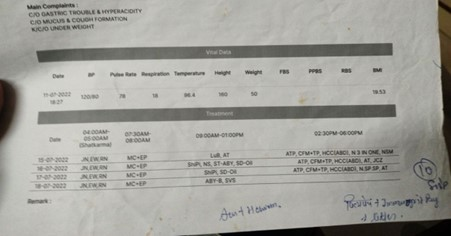

In [ ]:
img = cv2.imread('/content/pic3.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

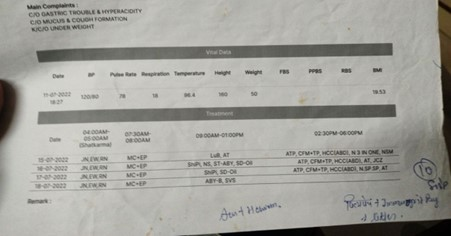

In [ ]:
img_path1='/content/pic3.jpg'
img = cv2.imread(img_path1, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result1 = ocr.ocr(img_path1, cls=True)
for line in result1:
    print(line)

[2024/04/02 07:11:36] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.03741025924682617
[2024/04/02 07:11:36] ppocr DEBUG: cls num  : 18, elapsed : 0.027668237686157227
[2024/04/02 07:11:36] ppocr DEBUG: rec_res num  : 18, elapsed : 0.1531522274017334
[[[[49.0, 136.0], [61.0, 136.0], [61.0, 143.0], [49.0, 143.0]], ('Datit', 0.7978571653366089)], [[[314.0, 130.0], [360.0, 130.0], [360.0, 137.0], [314.0, 137.0]], ('02:30PM06:00P%', 0.9332407712936401)], [[[126.0, 151.0], [148.0, 151.0], [148.0, 162.0], [126.0, 162.0]], ('MC-EP', 0.8983837366104126)], [[[284.0, 148.0], [392.0, 145.0], [393.0, 156.0], [284.0, 158.0]], ('A', 0.5284854173660278)], [[[127.0, 162.0], [147.0, 162.0], [147.0, 170.0], [127.0, 170.0]], ('VC-EP', 0.8955944776535034)], [[[186.0, 159.0], [253.0, 157.0], [254.0, 167.0], [186.0, 170.0]], ('NSST-AYSO', 0.7190034985542297)], [[[291.0, 164.0], [384.0, 163.0], [385.0, 174.0], [291.0, 175.0]], ('AP.CMCA', 0.753496527671814)], [[[297.0, 157.0], [383.0, 157.0], [383.0, 164.0], [2

In [37]:
from PIL import Image

#command to change the pngs to jpeg format.
# Open the PNG file
png_image = Image.open("/content/drive/MyDrive/sharpened_images/sharpened_pic_8.png")

# Convert and save as JPEG
png_image.convert("RGB").save("/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture9.jpg", "JPEG")


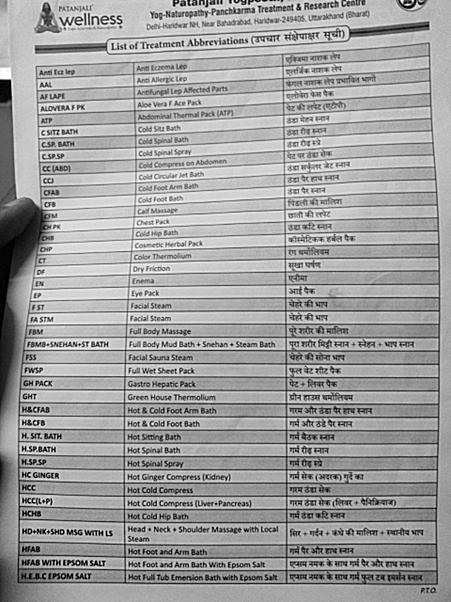

[2024/04/03 19:41:00] ppocr DEBUG: dt_boxes num : 131, elapsed : 0.10147404670715332
[2024/04/03 19:41:00] ppocr DEBUG: cls num  : 131, elapsed : 0.18266820907592773
[2024/04/03 19:41:01] ppocr DEBUG: rec_res num  : 131, elapsed : 0.4710524082183838
[[[[57.0, 2.0], [95.0, 2.0], [95.0, 13.0], [57.0, 13.0]], ('PATANJALE', 0.8766864538192749)], [[[146.0, 8.0], [366.0, 0.0], [367.0, 12.0], [146.0, 22.0]], ('Yog-Naturopathy-Panchkarma Treatment & Research Cealre', 0.9008437395095825)], [[[172.0, 1.0], [214.0, 1.0], [214.0, 8.0], [172.0, 8.0]], ('efueed', 0.5279244780540466)], [[[55.0, 12.0], [124.0, 10.0], [125.0, 27.0], [56.0, 29.0]], ('wellness', 0.9914571046829224)], [[[144.0, 21.0], [371.0, 7.0], [372.0, 21.0], [145.0, 35.0]], ('40', 0.6447722315788269)], [[[106.0, 41.0], [347.0, 26.0], [348.0, 39.0], [107.0, 54.0]], ('List of Treatment Abbreviations a  ', 0.8915944695472717)], [[[38.0, 67.0], [77.0, 67.0], [77.0, 77.0], [38.0, 77.0]], ('Anti Ect leg', 0.7479734420776367)], [[[134.0, 64

In [38]:


img_path8 = '/content/drive/MyDrive/sharpened_images/saved_jpeg/Picture8.jpg'

img1 = cv2.imread(img_path1, cv2.IMREAD_UNCHANGED)
cv2_imshow(img1)

result = ocr.ocr(img_path1, cls=True)
for line in result:
    print(line)
    l1.append(line)



In [ ]:
!pip install Pillow

from PIL import ImageFont


In [ ]:
image = Image.open(img_path1).convert('RGB')

boxes = [line[0] for line in result1]
txts = [line[1][0] for line in result1]
scores = [line[1][1] for line in result1]
font = ImageFont.load_default()
im_show = draw_ocr(image, boxes, txts, scores,font_path=None )
im_show = Image.fromarray(im_show)
im_show.save('result1.jpg')

TypeError: '<' not supported between instances of 'tuple' and 'float'

In [ ]:
image = Image.open(img_path1).convert('RGB')

# Extract boxes, text, and scores from result1
boxes = [item[0] for item in result1]
txts = [item[1][0] for item in result1]  # Assuming text is the first element in the nested tuple
scores = [item[1][1] for item in result1]  # Assuming score is the second element in the nested tuple

# Load default font
font = ImageFont.load_default()

# Draw OCR results on the image
im_show = draw_ocr(image, boxes, txts, scores, font_path=None)  # Assuming font_path is None for default font

# Convert the resulting image array to PIL image
im_show = Image.fromarray(im_show)

# Save the image
im_show.save('result1.jpg')


TypeError: '<' not supported between instances of 'tuple' and 'float'

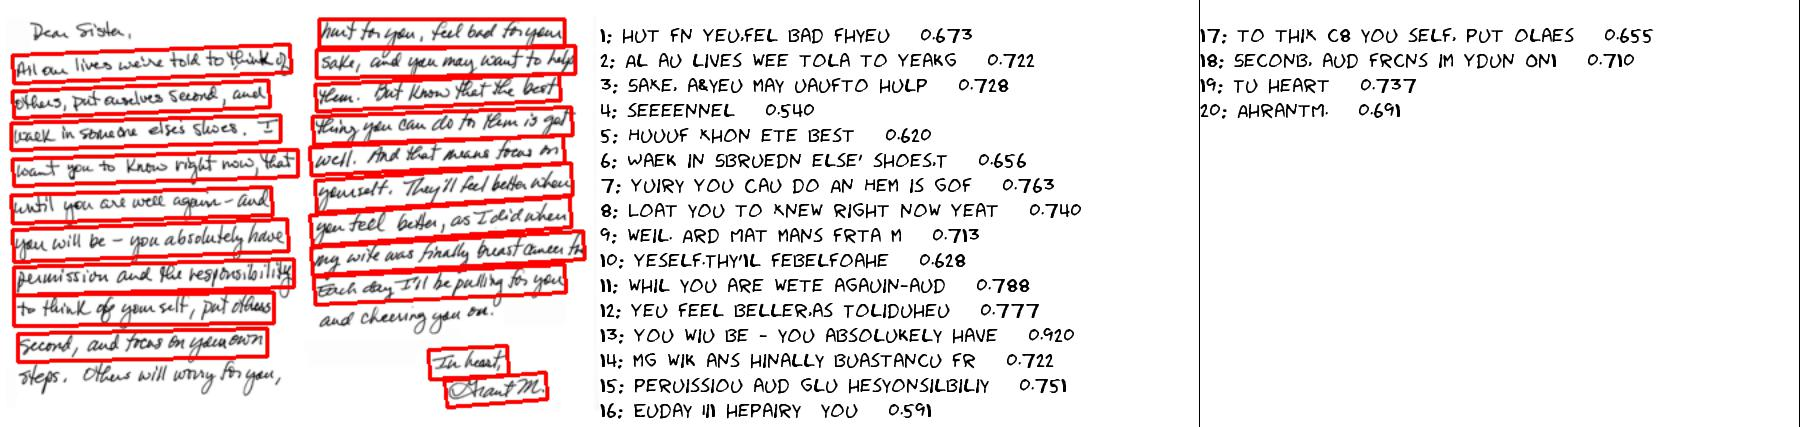

In [ ]:
img = cv2.imread('/content/result1.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

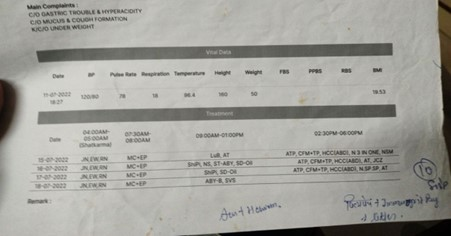

In [ ]:
img_path2='/content/pic3.jpg'
img = cv2.imread(img_path2, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result = ocr.ocr(img_path2, cls=True)
for line in result:
    print(line)

[2024/04/02 07:23:33] ppocr DEBUG: dt_boxes num : 18, elapsed : 0.026180028915405273
[2024/04/02 07:23:33] ppocr DEBUG: cls num  : 18, elapsed : 0.02552938461303711
[2024/04/02 07:23:34] ppocr DEBUG: rec_res num  : 18, elapsed : 0.07710146903991699
[[[[49.0, 136.0], [61.0, 136.0], [61.0, 143.0], [49.0, 143.0]], ('Datit', 0.7978571653366089)], [[[314.0, 130.0], [360.0, 130.0], [360.0, 137.0], [314.0, 137.0]], ('02:30PM06:00P%', 0.9332407712936401)], [[[126.0, 151.0], [148.0, 151.0], [148.0, 162.0], [126.0, 162.0]], ('MC-EP', 0.8983837366104126)], [[[284.0, 148.0], [392.0, 145.0], [393.0, 156.0], [284.0, 158.0]], ('A', 0.5284854173660278)], [[[127.0, 162.0], [147.0, 162.0], [147.0, 170.0], [127.0, 170.0]], ('VC-EP', 0.8955944776535034)], [[[186.0, 159.0], [253.0, 157.0], [254.0, 167.0], [186.0, 170.0]], ('NSST-AYSO', 0.7190034985542297)], [[[291.0, 164.0], [384.0, 163.0], [385.0, 174.0], [291.0, 175.0]], ('AP.CMCA', 0.753496527671814)], [[[297.0, 157.0], [383.0, 157.0], [383.0, 164.0], [

In [ ]:
image = Image.open(img_path2).convert('RGB')

boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
font = ImageFont.load_default()
im_show = draw_ocr(image, boxes, txts, scores,font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf' )
im_show = Image.fromarray(im_show)
im_show.save('result2.jpg')

TypeError: '<' not supported between instances of 'tuple' and 'float'

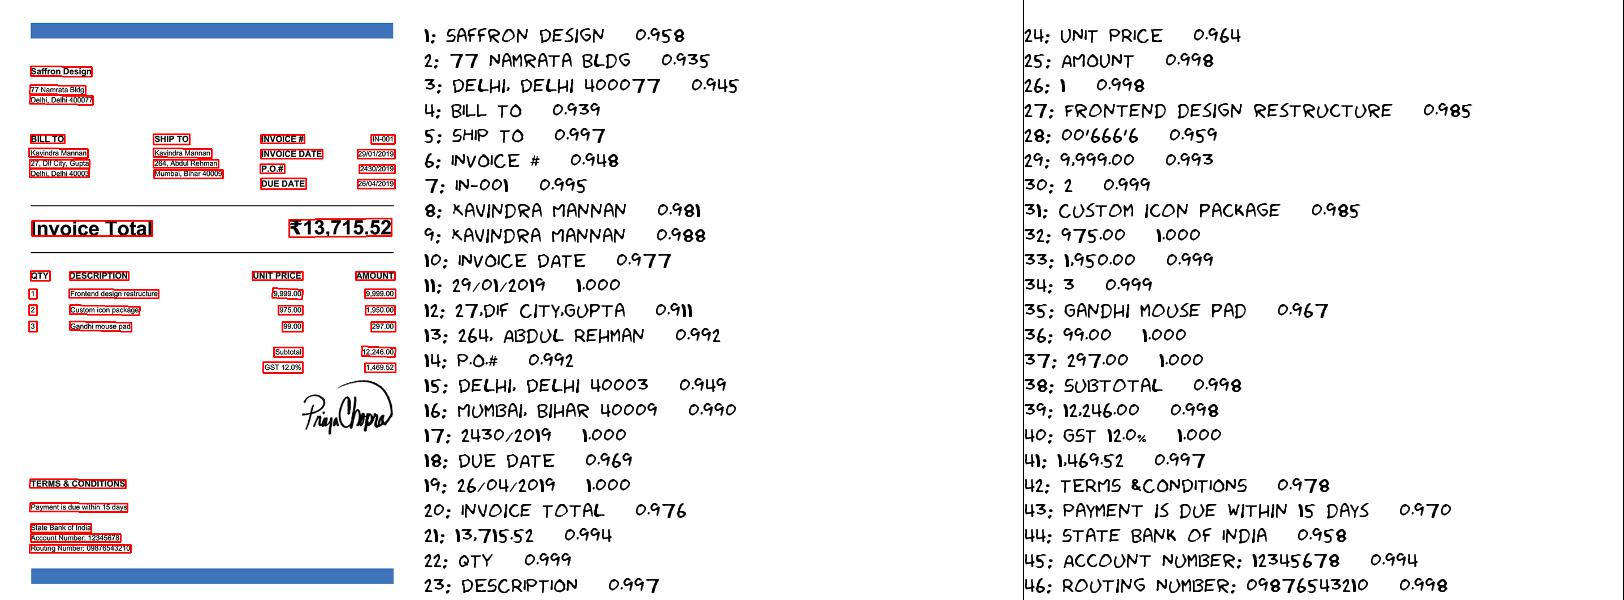

In [ ]:
img = cv2.imread('/content/result2.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

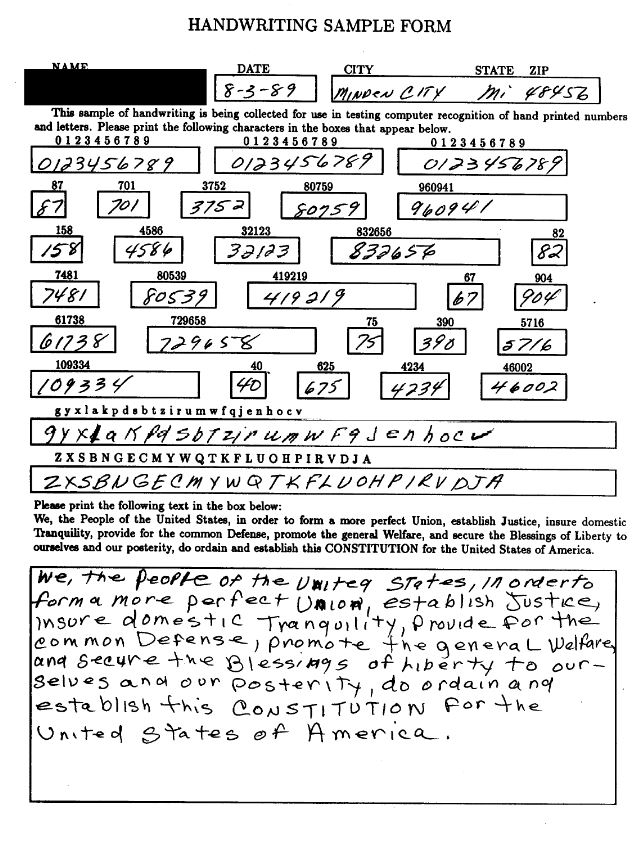

In [ ]:
img_path3='/content/HWImage.jpg'
img = cv2.imread(img_path3, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result3 = ocr.ocr(img_path3, cls=True)
for line in result3:
    print(line)

[2022/08/10 08:23:49] ppocr DEBUG: dt_boxes num : 71, elapse : 0.054993391036987305
[2022/08/10 08:23:49] ppocr DEBUG: cls num  : 71, elapse : 0.045597076416015625
[2022/08/10 08:23:49] ppocr DEBUG: rec_res num  : 71, elapse : 0.23179984092712402
[[[187.0, 15.0], [453.0, 16.0], [453.0, 34.0], [187.0, 32.0]], ('HANDWRITING SAMPLE FORM', 0.9729039669036865)]
[[[235.0, 61.0], [272.0, 61.0], [272.0, 75.0], [235.0, 75.0]], ('DATE', 0.9984341263771057)]
[[[343.0, 63.0], [375.0, 63.0], [375.0, 74.0], [343.0, 74.0]], ('CITY', 0.9981421232223511)]
[[[474.0, 63.0], [521.0, 63.0], [521.0, 77.0], [474.0, 77.0]], ('STATE', 0.9965044260025024)]
[[[515.0, 63.0], [550.0, 63.0], [550.0, 77.0], [515.0, 77.0]], ('ZIP', 0.9731037020683289)]
[[[220.0, 81.0], [298.0, 81.0], [298.0, 99.0], [220.0, 99.0]], ('8-3-89', 0.9766564965248108)]
[[[333.0, 84.0], [447.0, 83.0], [447.0, 98.0], [333.0, 100.0]], ('PlINDeN CITY', 0.7225809097290039)]
[[[477.0, 83.0], [592.0, 83.0], [592.0, 101.0], [477.0, 101.0]], ('Mi484

In [ ]:
image = Image.open(img_path3).convert('RGB')

boxes = [line[0] for line in result3]
txts = [line[1][0] for line in result3]
scores = [line[1][1] for line in result3]
font = ImageFont.load_default()
im_show = draw_ocr(image, boxes, txts, scores,font_path='/usr/share/fonts/truetype/humor-sans/Humor-Sans.ttf' )
im_show = Image.fromarray(im_show)
im_show.save('result3.jpg')

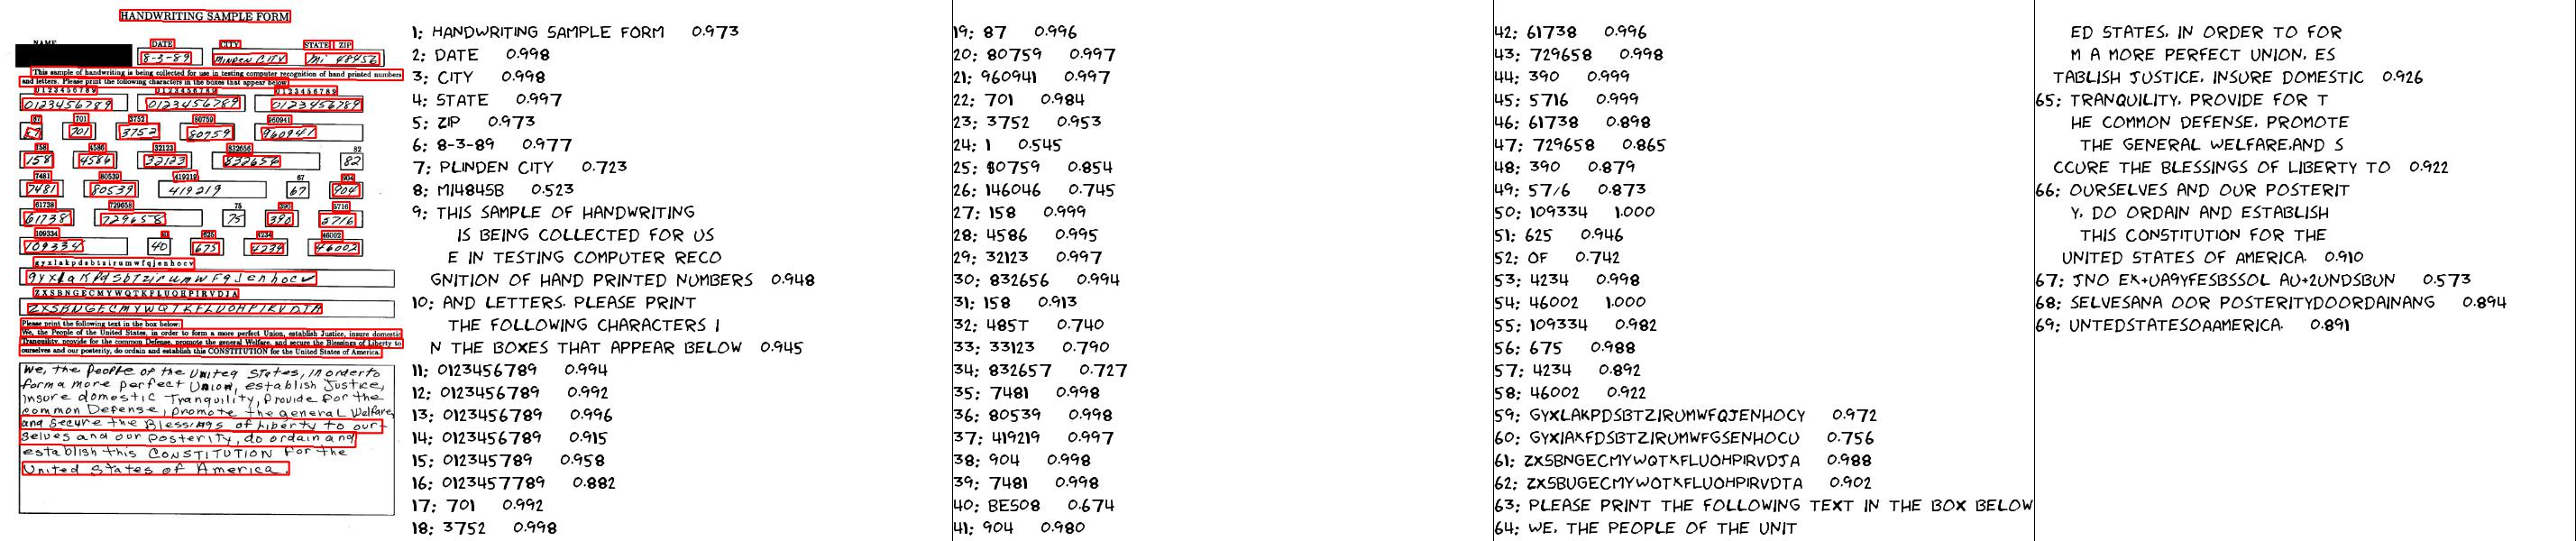

In [ ]:
img = cv2.imread('/content/result3.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)